# Visualizing CNN Weights

In [31]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Create a connection between the input and the target layer
model = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [32]:
def vizWeight(model, layer_name, epochs, step_size, filter_index):
    # Generate Submodel
    submodel = tf.keras.models.Model([model.inputs[0]], [model.get_layer(layer_name).output])
    
    # Initiate random noise
    input_img_data = np.random.random((1, 224, 224, 3))
    input_img_data = (input_img_data - 0.5) * 20 + 128.
    
    # Cast random noise from np.float64 to tf.float32 Variable
    input_img_data = tf.Variable(tf.cast(input_img_data, tf.float32))
    
    # Iterate gradient ascents
    for _ in range(epochs):
        with tf.GradientTape() as tape:
            outputs = submodel(input_img_data)
            loss_value = tf.reduce_mean(outputs[:, :, :, filter_index])
        grads = tape.gradient(loss_value, input_img_data)
        normalized_grads = grads / (tf.sqrt(tf.reduce_mean(tf.square(grads))) + 1e-5)
        input_img_data.assign_add(normalized_grads * step_size)
        
    return input_img_data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


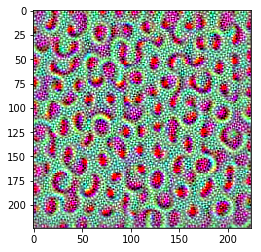

In [40]:
# Layer name to inspect
layer_name = 'block4_conv1'
epochs = 100
step_size = 1.
filter_index = 0


input_img_data = vizWeight(model, layer_name, epochs, step_size, filter_index)
plt.imshow(input_img_data[0]/255)